##Aluna: Andréa Fonseca

# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [23]:
batch_size = 1000

### Carregamento, criação dataset e do dataloader

In [43]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de treinamento: 60

Dimensões dos dados de um minibatch: torch.Size([1000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [44]:
print('Número de minibatches de treinamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de treinamento: 60


## Modelo

In [45]:
model = torch.nn.Linear(28*28, 10)

In [46]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.1393,  0.4937,  0.0833,  0.4824, -0.3542,  0.5174,  0.5596,  0.5974,
         -0.3712,  0.6781]], grad_fn=<AddmmBackward0>)

In [47]:
x, y = dataset_train[0]

In [48]:
x

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

## Treinamento

### Inicialização dos parâmetros

In [49]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [50]:
epochs = []
losses = []

total_trained_samples = 0

for i in range(n_epochs): # for da epoca

    for k,(x_train, y_train) in enumerate(loader_train): # for do dataloader

        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [52]:
print('Final loss:', loss.data)

Final loss: tensor(0.3188)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

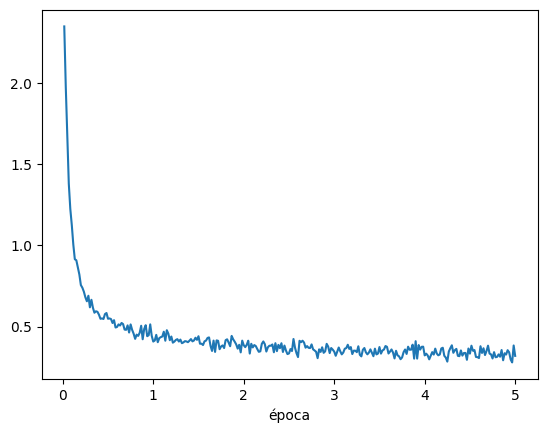

In [53]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

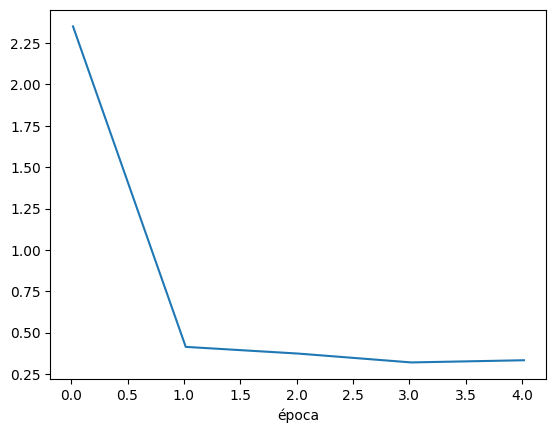

In [54]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?

1000

2. Em uma época, quantos mini-batches existem?

60

3. Qual é a definição de época?

É uma iteração em que são executadas as sequências de passagem dos dados pelos neurônios para previsão, é calculada a perda da previsão em relação ao dado original e são ajustados os pesos de cada neurônio, conforme a perda e a taxa de treinamento, no backpropagation. A cada época o ciclo se repete, com a convergência dos pesos ao mínimo, minimizando a perda.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

In [55]:
epochs = []
losses = []

total_trained_samples = 0

for i in range(n_epochs): # for da epoca

    for k,(x_train, y_train) in enumerate(loader_train): # for do dataloader

        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f'Época: {i}/{n_epochs - 1}, Batch: {k}/{len(loader_train)}')

Época: 0/4, Batch: 0/60
Época: 0/4, Batch: 1/60
Época: 0/4, Batch: 2/60
Época: 0/4, Batch: 3/60
Época: 0/4, Batch: 4/60
Época: 0/4, Batch: 5/60
Época: 0/4, Batch: 6/60
Época: 0/4, Batch: 7/60
Época: 0/4, Batch: 8/60
Época: 0/4, Batch: 9/60
Época: 0/4, Batch: 10/60
Época: 0/4, Batch: 11/60
Época: 0/4, Batch: 12/60
Época: 0/4, Batch: 13/60
Época: 0/4, Batch: 14/60
Época: 0/4, Batch: 15/60
Época: 0/4, Batch: 16/60
Época: 0/4, Batch: 17/60
Época: 0/4, Batch: 18/60
Época: 0/4, Batch: 19/60
Época: 0/4, Batch: 20/60
Época: 0/4, Batch: 21/60
Época: 0/4, Batch: 22/60
Época: 0/4, Batch: 23/60
Época: 0/4, Batch: 24/60
Época: 0/4, Batch: 25/60
Época: 0/4, Batch: 26/60
Época: 0/4, Batch: 27/60
Época: 0/4, Batch: 28/60
Época: 0/4, Batch: 29/60
Época: 0/4, Batch: 30/60
Época: 0/4, Batch: 31/60
Época: 0/4, Batch: 32/60
Época: 0/4, Batch: 33/60
Época: 0/4, Batch: 34/60
Época: 0/4, Batch: 35/60
Época: 0/4, Batch: 36/60
Época: 0/4, Batch: 37/60
Época: 0/4, Batch: 38/60
Época: 0/4, Batch: 39/60
Época: 0/4

2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

##Batch size = 500

In [58]:
batch_size = 500

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

model = torch.nn.Linear(28*28, 10)

x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

epochs = []
losses = []

total_trained_samples = 0

for i in range(n_epochs): # for da epoca

    for k,(x_train, y_train) in enumerate(loader_train): # for do dataloader

        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

print('Final loss:', loss.data)

Número de minibatches de treinamento: 120

Dimensões dos dados de um minibatch: torch.Size([500, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>
torch.Size([1, 784])
Final loss: tensor(0.3051)


Text(0.5, 0, 'época')

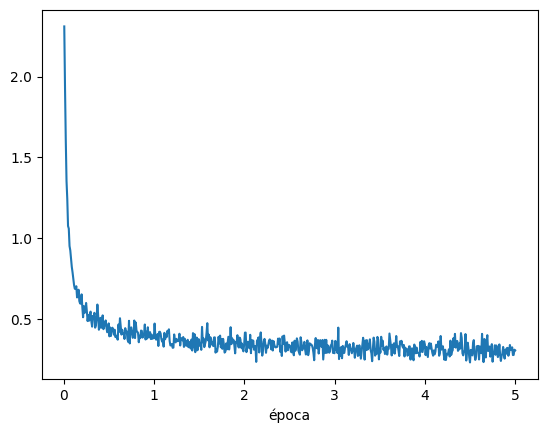

In [59]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

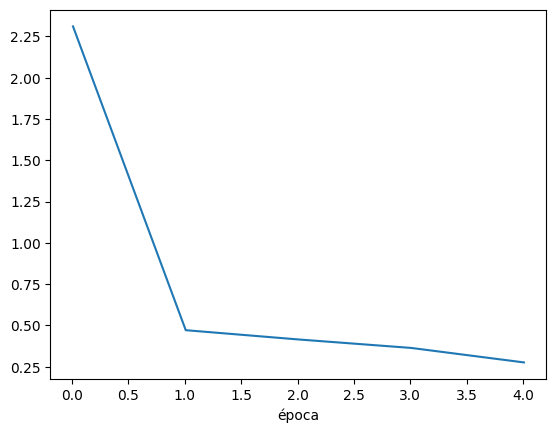

In [60]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

##Batch size = 200

In [61]:
batch_size = 200

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

model = torch.nn.Linear(28*28, 10)

x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

epochs = []
losses = []

total_trained_samples = 0

for i in range(n_epochs): # for da epoca

    for k,(x_train, y_train) in enumerate(loader_train): # for do dataloader

        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

print('Final loss:', loss.data)

Número de minibatches de treinamento: 300

Dimensões dos dados de um minibatch: torch.Size([200, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>
torch.Size([1, 784])
Final loss: tensor(0.3082)


Text(0.5, 0, 'época')

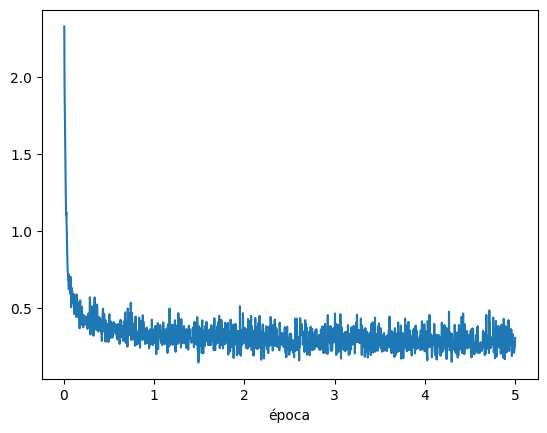

In [62]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

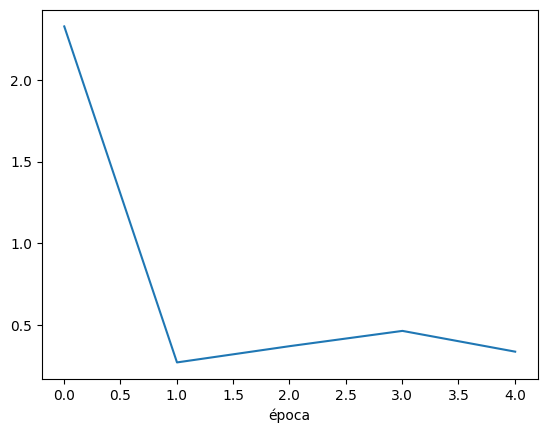

In [63]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

##Batch size = 100

In [70]:
batch_size = 100

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

model = torch.nn.Linear(28*28, 10)

x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

epochs = []
losses = []

total_trained_samples = 0

for i in range(n_epochs): # for da epoca

    for k,(x_train, y_train) in enumerate(loader_train): # for do dataloader

        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

print('Final loss:', loss.data)

Número de minibatches de treinamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>
torch.Size([1, 784])
Final loss: tensor(0.1681)


Text(0.5, 0, 'época')

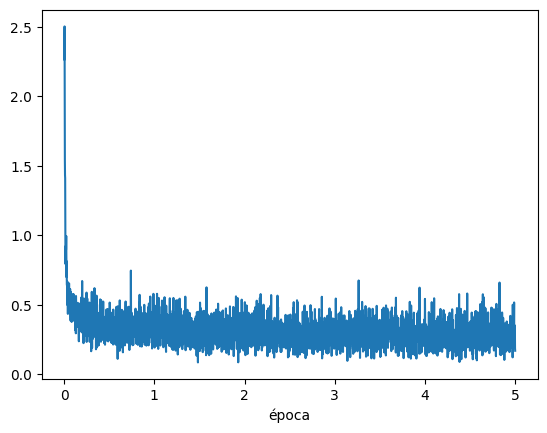

In [71]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

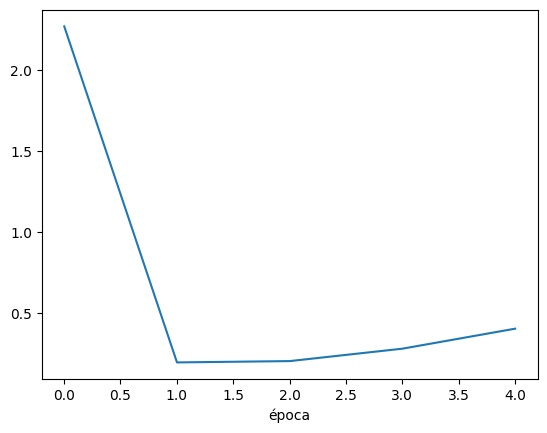

In [72]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

##Batch size = 2000

In [64]:
batch_size = 2000

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

model = torch.nn.Linear(28*28, 10)

x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

epochs = []
losses = []

total_trained_samples = 0

for i in range(n_epochs): # for da epoca

    for k,(x_train, y_train) in enumerate(loader_train): # for do dataloader

        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

print('Final loss:', loss.data)

Número de minibatches de treinamento: 30

Dimensões dos dados de um minibatch: torch.Size([2000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>
torch.Size([1, 784])
Final loss: tensor(0.3374)


Text(0.5, 0, 'época')

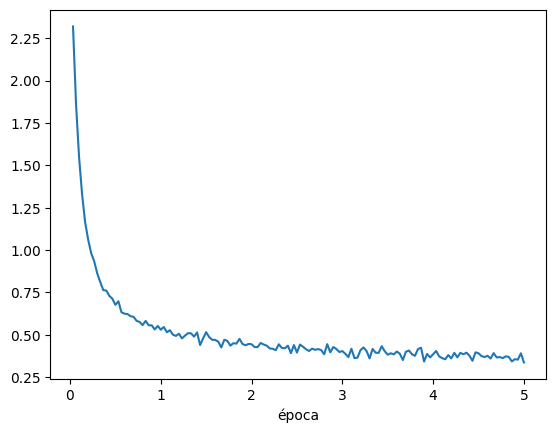

In [65]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

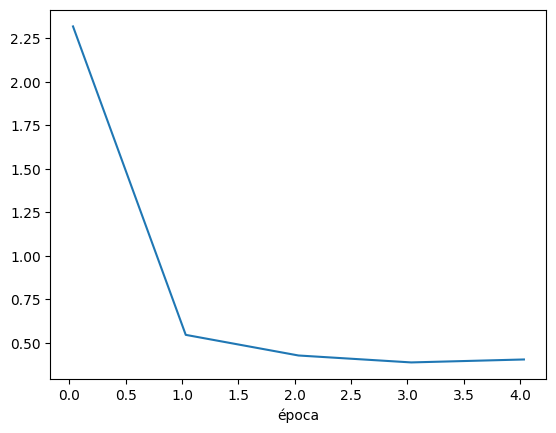

In [66]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

##Batch size = 3000

In [67]:
batch_size = 3000

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

model = torch.nn.Linear(28*28, 10)

x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

epochs = []
losses = []

total_trained_samples = 0

for i in range(n_epochs): # for da epoca

    for k,(x_train, y_train) in enumerate(loader_train): # for do dataloader

        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

print('Final loss:', loss.data)

Número de minibatches de treinamento: 20

Dimensões dos dados de um minibatch: torch.Size([3000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>
torch.Size([1, 784])
Final loss: tensor(0.3868)


Text(0.5, 0, 'época')

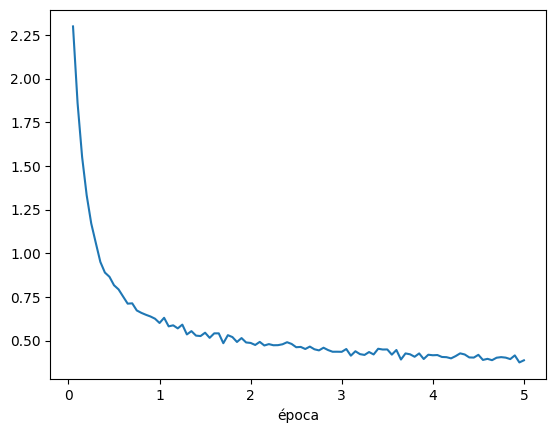

In [68]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

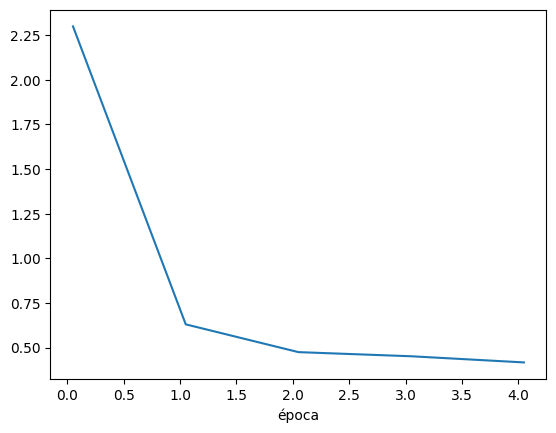

In [69]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

## Conclusões sobre os experimentos deste notebook

O aumento do tamanho do batch e, por conseguinte, a diminuição de quantidade de batches, parece trazer um decaimento da perda mais constante, levando à convergência mais suavemente, mas precisando de mais épocas para chegar à perda mínima.
Batches de tamanhos menores e, por conseguinte, em maior quantidade, permitem chegar à menor perda rapidamente, mas ao diminuir muito o tamanho do batch, a perda começa a aumentar no final das épocas.
